In [12]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Problem 1

### data preparation

In [74]:
data = pd.read_csv('train.csv')

# problem 1
sale_price_data = data['SalePrice']
lot_area_data = data['LotArea']
gr_liv_area_data = data['GrLivArea']
total_bsmt_sf_data = data['TotalBsmtSF']
garage_area_data = data['GarageArea']

# problem 2
ms_sub_class = data['MSSubClass']
neighborhood_data = data['Neighborhood']
bldg_type_data = data['BldgType']
overall_qual_data = data['OverallQual']

### Problem 1.a


In [58]:
def get_num_outliners(df):
    q_1 = df.describe()['25%']
    q_3 = df.describe()['75%']
    iqr = q_3 - q_1
    end = q_3 + iqr * 1.5
    start = q_1 - iqr * 1.5

    count = 0
    for d in df:
        if d < start or d > end:
            count += 1
    return count

print("Number of outliners(LotArea) - ", get_num_outliners(lot_area_data))
print("Number of outliners(GrLivArea) - ", get_num_outliners(gr_liv_area_data))
print("Number of outliners(TotalBsmtSF) - ", get_num_outliners(total_bsmt_sf_data))
print("Number of outliners(GarageArea) - ", get_num_outliners(garage_area_data))

Number of outliners(LotArea) -  69
Number of outliners(GrLivArea) -  31
Number of outliners(TotalBsmtSF) -  61
Number of outliners(GarageArea) -  21


### Problem 1.b

In [63]:

print("Skewness of LotArea - ", lot_area_data.skew())
print("Skewness of GrLivArea - ", gr_liv_area_data.skew())
print("Skewness of TotalBsmtSF - ", total_bsmt_sf_data.skew())
print("Skewness of GarageArea - ", garage_area_data.skew())

Skewness of LotArea -  12.207687851233496
Skewness of GrLivArea -  1.3665603560164552
Skewness of TotalBsmtSF -  1.5242545490627664
Skewness of GarageArea -  0.17998090674623907


### Problem 1.c

In [71]:
joint_lot_area = pd.concat([lot_area_data, sale_price_data], axis = 1).reindex(lot_area_data.index)
joint_lot_area.corr()

,LotArea,SalePrice
LotArea,1.000000,0.263843
SalePrice,0.263843,1.000000


In [69]:
gr_liv_area = pd.concat([gr_liv_area_data, sale_price_data], axis = 1).reindex(gr_liv_area_data.index)
gr_liv_area.corr()

,GrLivArea,SalePrice
GrLivArea,1.000000,0.708624
SalePrice,0.708624,1.000000


In [72]:
total_bsmt_sf = pd.concat([total_bsmt_sf_data, sale_price_data], axis = 1).reindex(total_bsmt_sf_data.index)
total_bsmt_sf.corr()

,TotalBsmtSF,SalePrice
TotalBsmtSF,1.000000,0.613581
SalePrice,0.613581,1.000000


In [73]:
garage_area = pd.concat([garage_area_data, sale_price_data], axis = 1).reindex(garage_area_data.index)
garage_area.corr()

,GarageArea,SalePrice
GarageArea,1.000000,0.623431
SalePrice,0.623431,1.000000


## Problem 2

### Problem 2.a

In [90]:
# retrieve levels
ms_sub_class_levels = ms_sub_class.unique()
neighborhood_levels = neighborhood_data.unique()
bldg_type_levels = bldg_type_data.unique()
overall_qual_levels = overall_qual_data.unique()
print("number of level(MSSubClass) - ", len(ms_sub_class_levels))
print("number of level(Neighborhood) - ", len(neighborhood_levels))
print("number of level(BldgType) - ", len(bldg_type_levels))
print("number of level(OverallQual) - ", len(overall_qual_levels))
print("----------------------------------")

def count_highest_house(col_name, levels):
    """for counting highest number of houses for each level in a column
    """
    highest = 0
    r_level = None
    for level in levels:
        count = len(data.loc[data[col_name] == level])
        if count > highest:
            highest = count
            r_level = level

    print(f"highest number of houses is {highest} in variable {col_name} is level '{r_level}'")

count_highest_house('MSSubClass', ms_sub_class_levels)
count_highest_house('Neighborhood', neighborhood_data)
count_highest_house('BldgType', bldg_type_data)
count_highest_house('OverallQual', overall_qual_data)

# print("number of houses(MSSubClass) - ", ms_sub_class_levels)
# print("number of houses(Neighborhood) - ", len(neighborhood_levels))
# print("number of houses(BldgType) - ", len(bldg_type_levels))
# print("number of houses(OverallQual) - ", len(overall_qual_levels))

number of level(MSSubClass) -  15
number of level(Neighborhood) -  25
number of level(BldgType) -  5
number of level(OverallQual) -  10
----------------------------------
highest number of houses is 536 in variable MSSubClass is level '20'
highest number of houses is 225 in variable Neighborhood is level 'NAmes'
highest number of houses is 1220 in variable BldgType is level '1Fam'
highest number of houses is 397 in variable OverallQual is level '5'


### problem 2.b

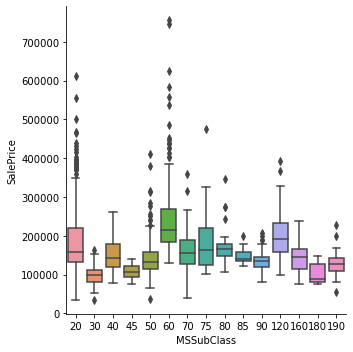

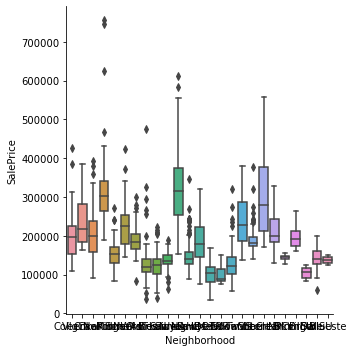

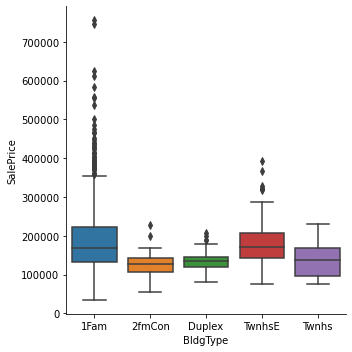

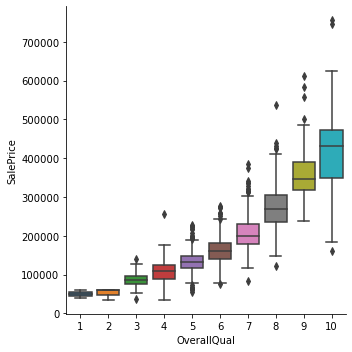

In [98]:
sb.catplot(x='MSSubClass', 
            y='SalePrice',
            data=data,
            kind='box');

sb.catplot(x='Neighborhood', 
            y='SalePrice',
            data=data,
            kind='box');

sb.catplot(x='BldgType', 
            y='SalePrice',
            data=data,
            kind='box');

sb.catplot(x='OverallQual', 
            y='SalePrice',
            data=data,
            kind='box');

## Problem 3

### problem 3.a

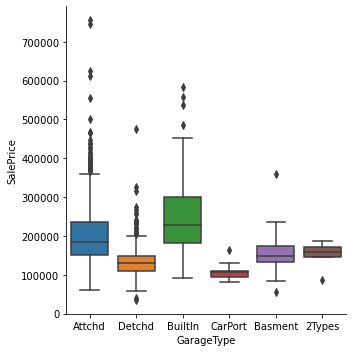

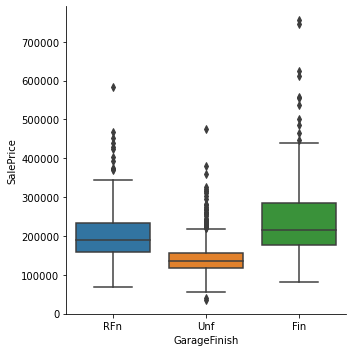

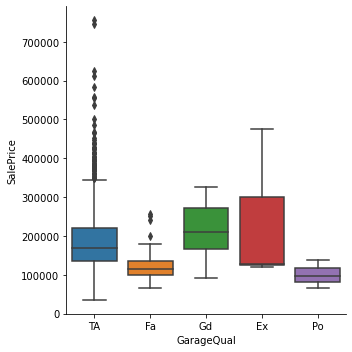

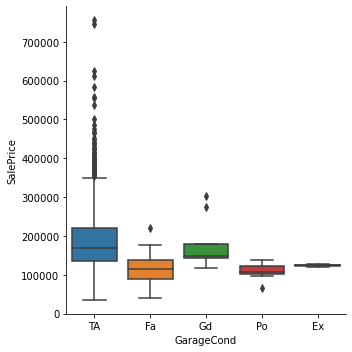

In [99]:
# GarageType
# GarageFinish
# GarageQual
# GarageCond
sb.catplot(x='GarageType', 
            y='SalePrice',
            data=data,
            kind='box');

sb.catplot(x='GarageFinish', 
            y='SalePrice',
            data=data,
            kind='box');

sb.catplot(x='GarageQual', 
            y='SalePrice',
            data=data,
            kind='box');

sb.catplot(x='GarageCond', 
            y='SalePrice',
            data=data,
            kind='box');